In [1]:
# It provide highly attractive and information statistical graphics with minimal code. 
# seaborn library based on matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [2]:
#Load Dataset
diamonds = sns.load_dataset('diamonds')

In [3]:
#1. Data Overview
print("=== Data Info ===")
print(diamonds.info())

=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None


In [4]:
print("\n=== First 5 Rows ===")
print(diamonds.head())


=== First 5 Rows ===
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [5]:
print("\n== Summary Statistics ===")
print(diamonds.describe())


== Summary Statistics ===
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%      

In [6]:
print("\n== Checking for missing values ===")
print(diamonds.isnull().sum())



== Checking for missing values ===
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


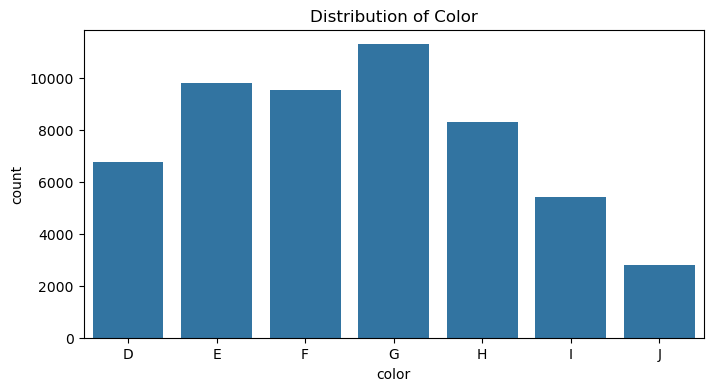

In [7]:
# Univariate Analysis
plt.figure(figsize=(8, 4))
sns.countplot(x='color', data=diamonds)
plt.title("Distribution of Color")
plt.show()


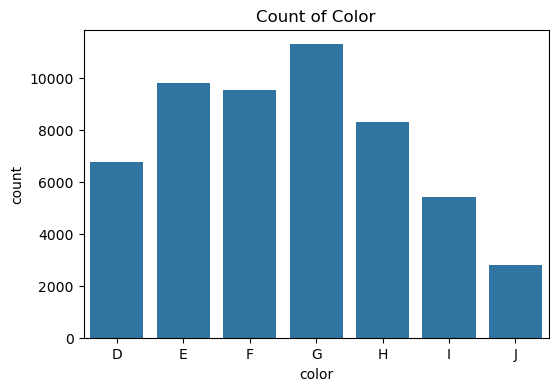

In [8]:
#Countplot 
plt.figure(figsize=(6,4))
sns.countplot(x='color', data=diamonds)
plt.title("Count of Color")
plt.show()

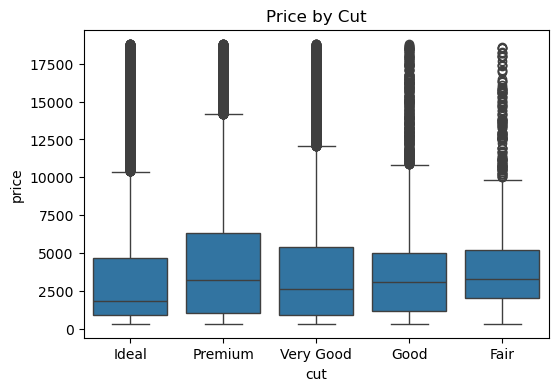

In [9]:
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x="cut", y="price", data=diamonds)
plt.title("Price by Cut")
plt.show()

In [10]:
#3. Bivariate Analysis
#Scatter plot

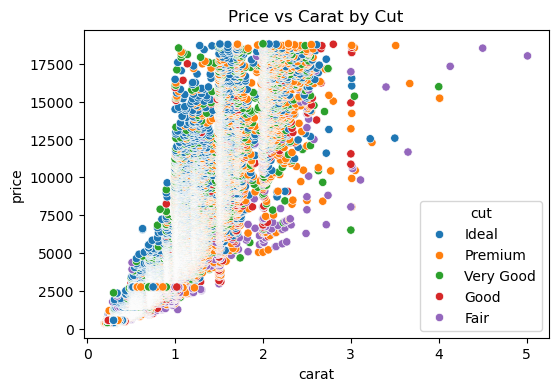

In [11]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='carat', y='price', data=diamonds, hue='cut')
plt.title("Price vs Carat by Cut")
plt.show()

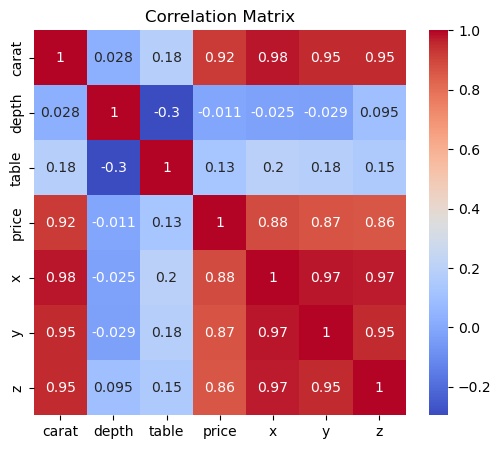

In [12]:
#4.Correlation Analysis
#Compute correlation matrix for numeric columns
numeric_columns = diamonds.select_dtypes(include=['float64', 'int64'])
corr = numeric_columns.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

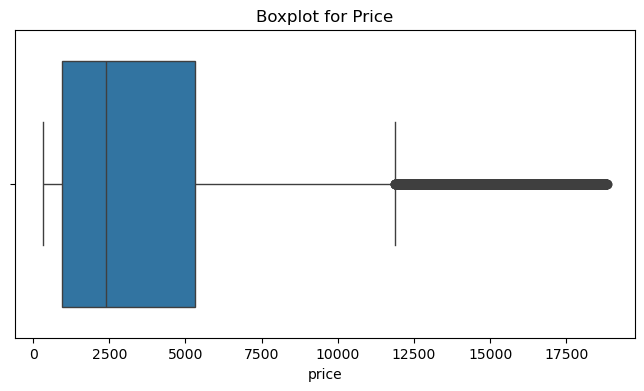

In [13]:
#5.Outlier Detection using BoxPlot
plt.figure(figsize=(8, 4))
sns.boxplot(x=diamonds['price'])
plt.title("Boxplot for Price")
plt.show()

In [14]:
#6. Outlier Removal (IQR method)

In [15]:
Q1 = diamonds['price'].quantile(0.25)
Q3 = diamonds['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

diamonds_clean = diamonds[(diamonds["price"] >= lower_bound) & (diamonds["price"] <= upper_bound)]

print(f"Original dataset size: {diamonds.shape[0]}")
print(f"Dataset size after removing outliers: {diamonds_clean.shape[0]}")

Original dataset size: 53940
Dataset size after removing outliers: 50400


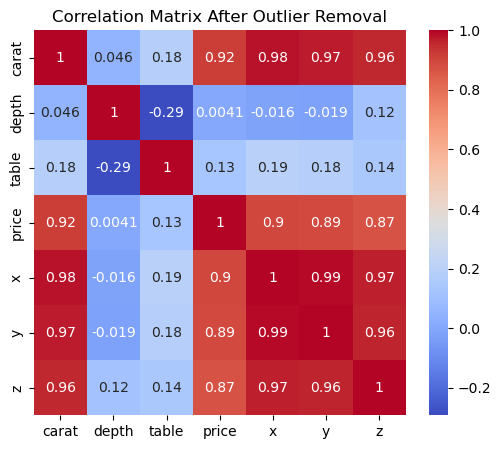

In [16]:
#7.Correlation After Outlier Removal
numeric_columns_clean = diamonds_clean.select_dtypes(include=['float64', 'int64'])
corr_clean = numeric_columns_clean.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_clean, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix After Outlier Removal")
plt.show()
